         ensembl_exon_id                                      exon_sequence  \
0   ENSMUSG00000101133.2  CACCTATACATGCAGGAAGAACAGTAATTACCTTCCTGAAGAGCTG...   
1   ENSMUSG00000101867.2  TTTCACACCGACTCCCATGAGAAAGGTTCACCAAGGCACTTGTTGG...   
2  ENSMUSG00000029625.17  AGAGCCCCGCAGGTCATTGGGGTCATGCAGAGTCAAAACAGCAGTG...   
3   ENSMUSG00000100967.2  TTTGGTGTGATTATTTGTTATGGCCCTGAGTATATAACTTGGTTTT...   
4   ENSMUSG00000100967.2  TTTGGTGTGATTATTTGTTATGGCCCTGAGTATATAACTTGGTTTT...   

                                        bin_sequence  bin       FUS    TARDBP  
0  CACCTATACATGCAGGAAGAACAGTAATTACCTTCCTGAAGAGCTG...    1  0.581589  0.246850  
1  TTTCACACCGACTCCCATGAGAAAGGTTCACCAAGGCACTTGTTGG...    1  0.397901  0.192597  
2  AGAGCCCCGCAGGTCATTGGGGTCATGCAGAGTCAAAACAGCAGTG...    1  0.500913  0.224677  
3  TTTGGTGTGATTATTTGTTATGGCCCTGAGTATATAACTTGGTTTT...    1  0.429128  0.009407  
4  AGAAATTGGGGTTTTAAGAAATACTTATTTTATGTGTGTCTGAGCA...    2  0.694875  0.959879  
<class 'pandas.core.frame.DataFrame'>
RangeIn

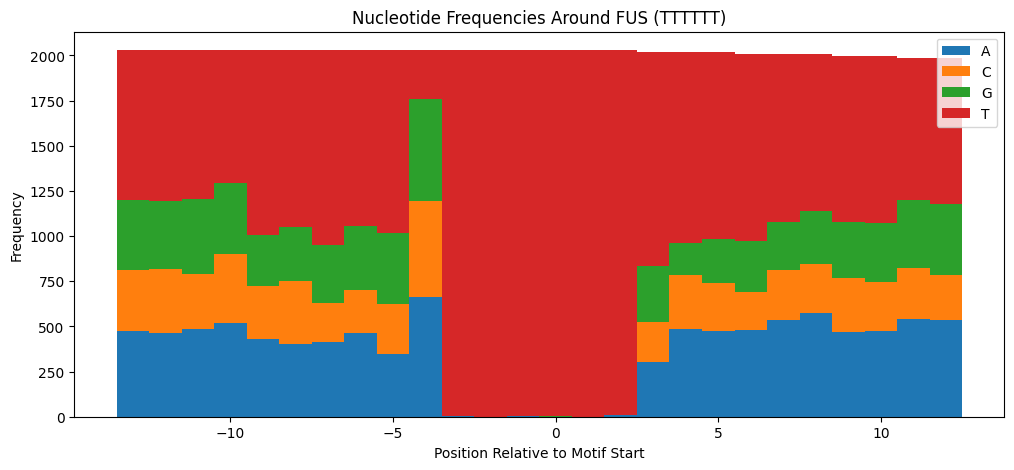

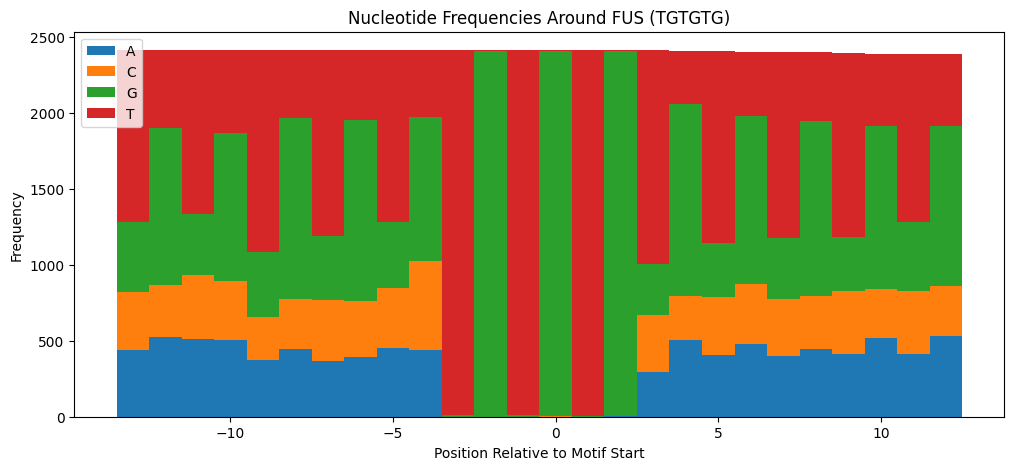

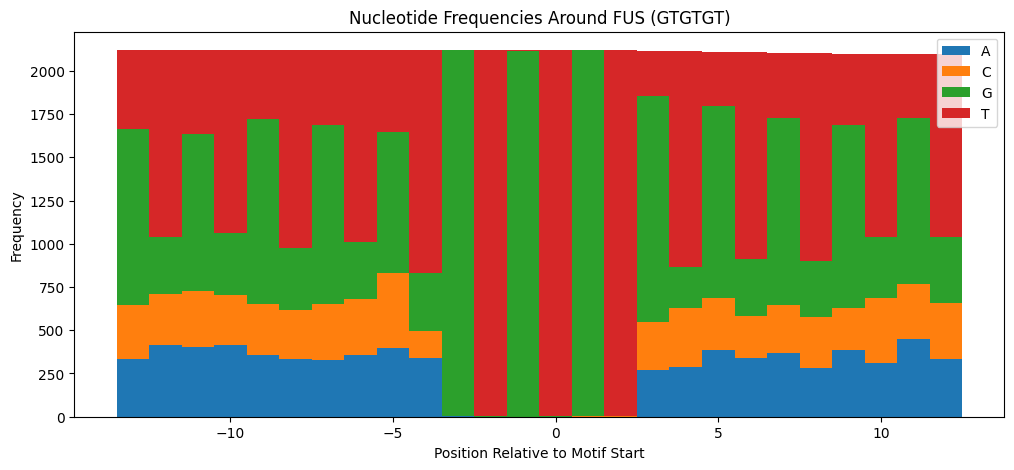

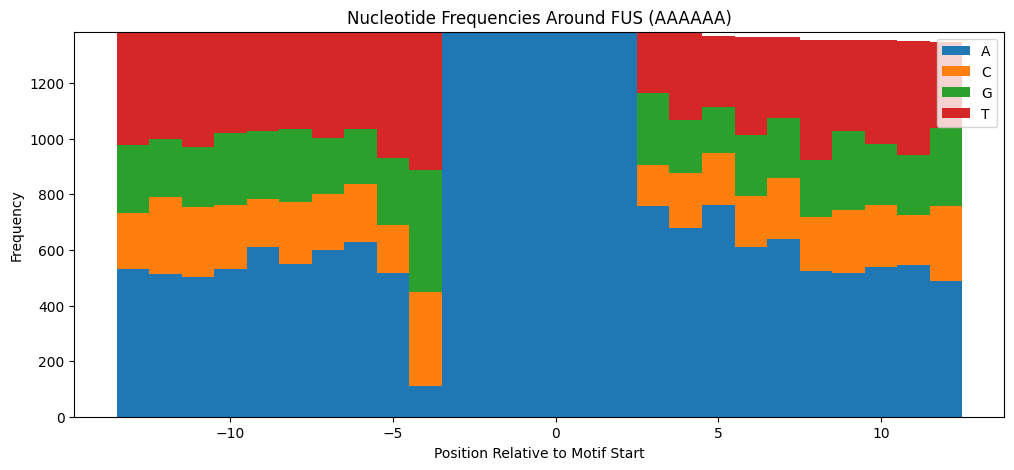

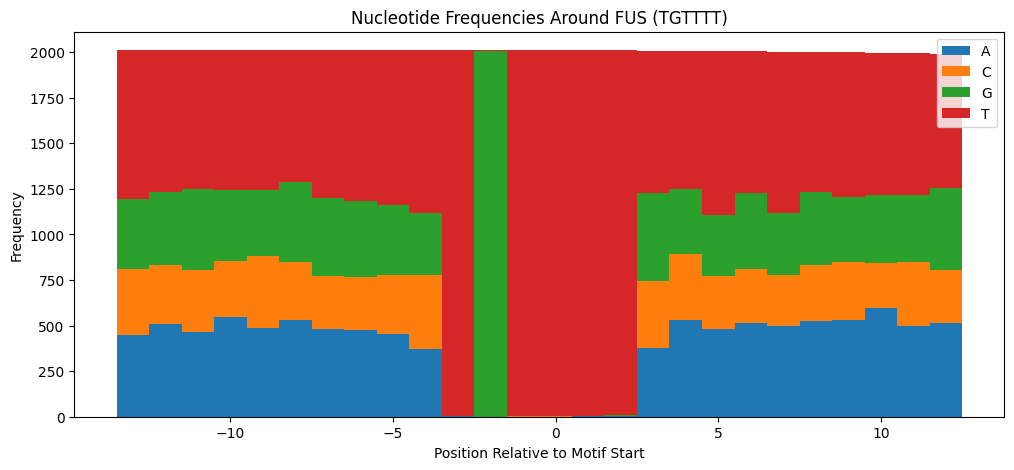

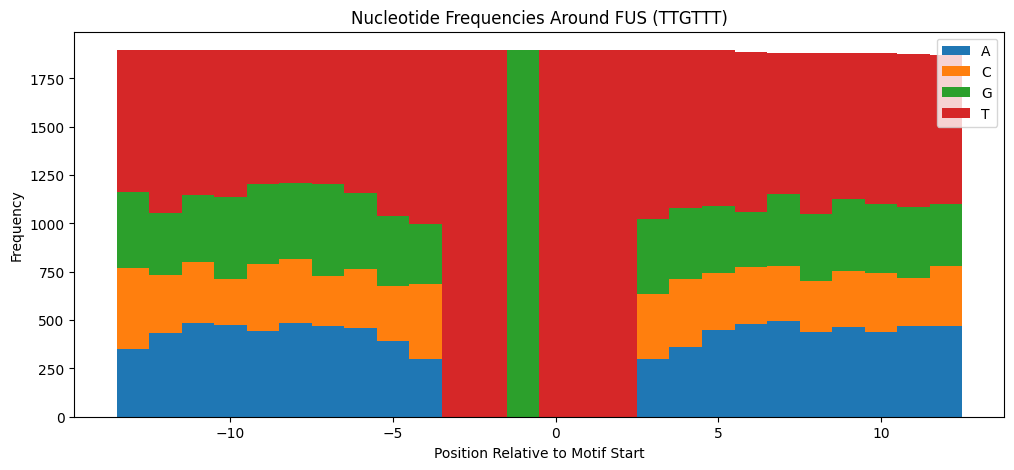

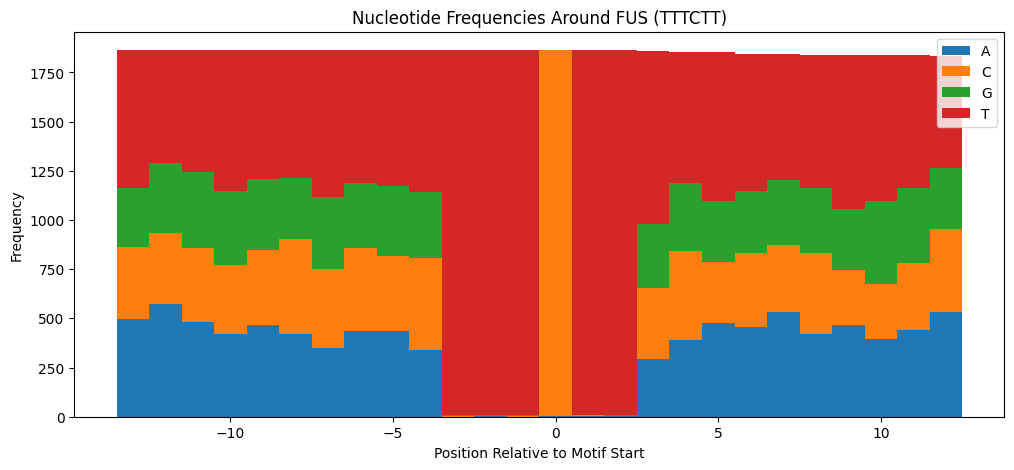

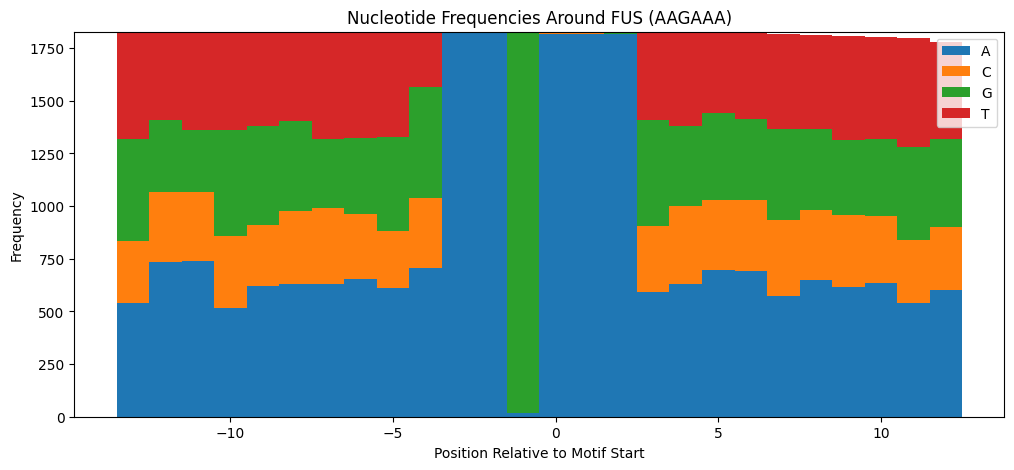

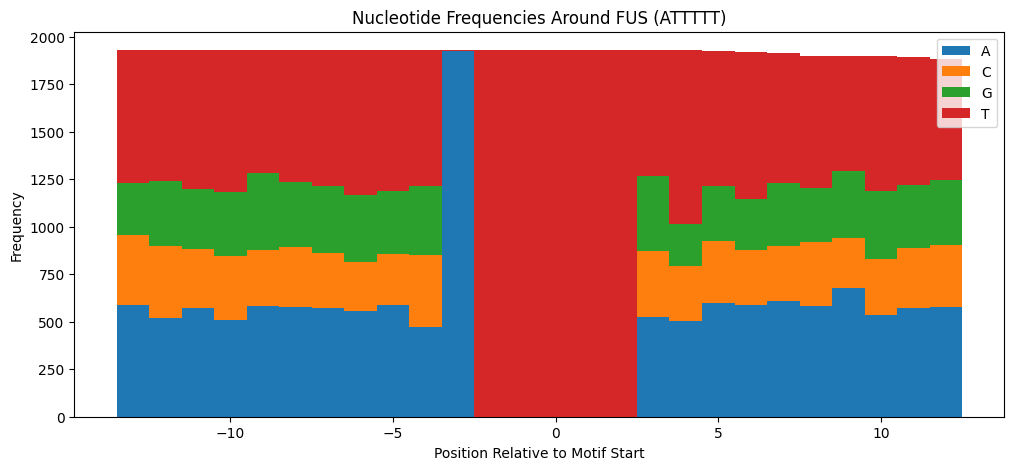

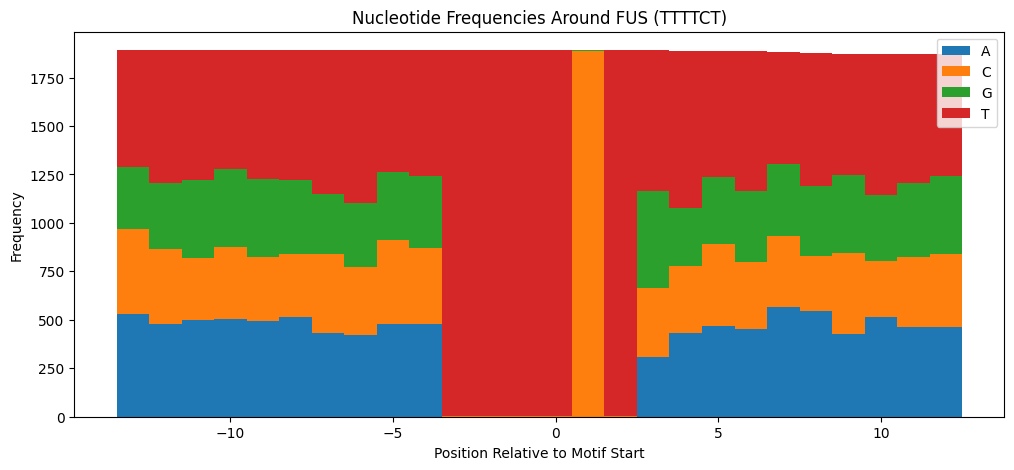

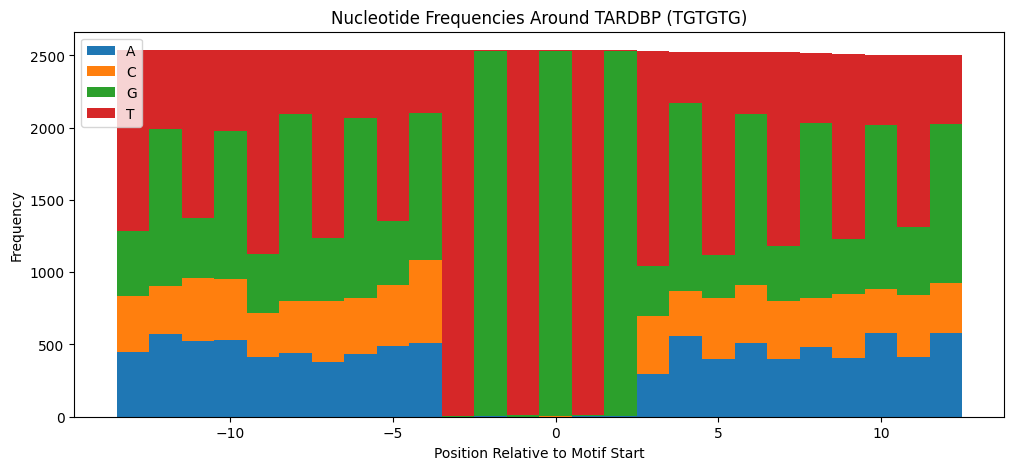

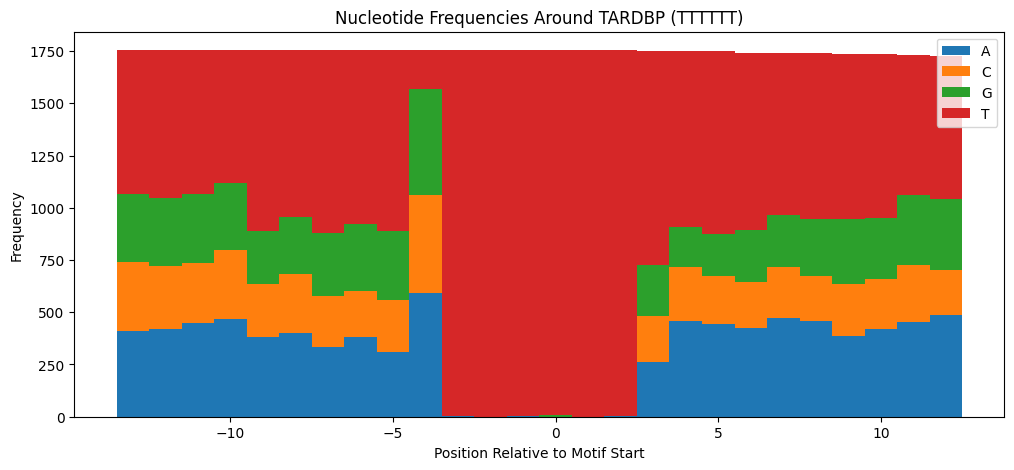

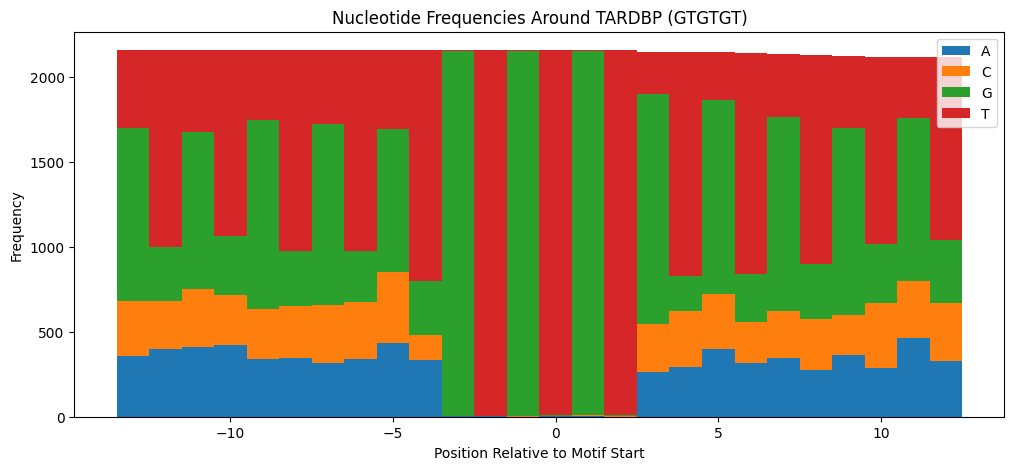

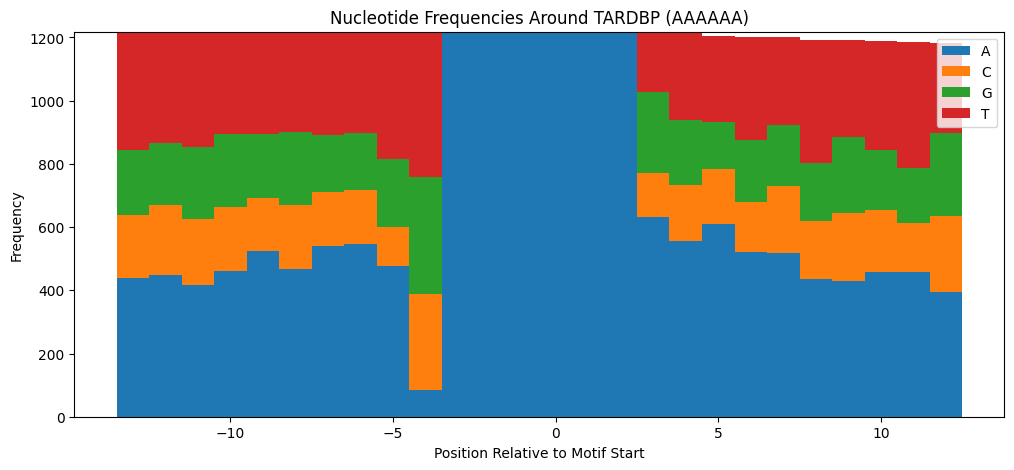

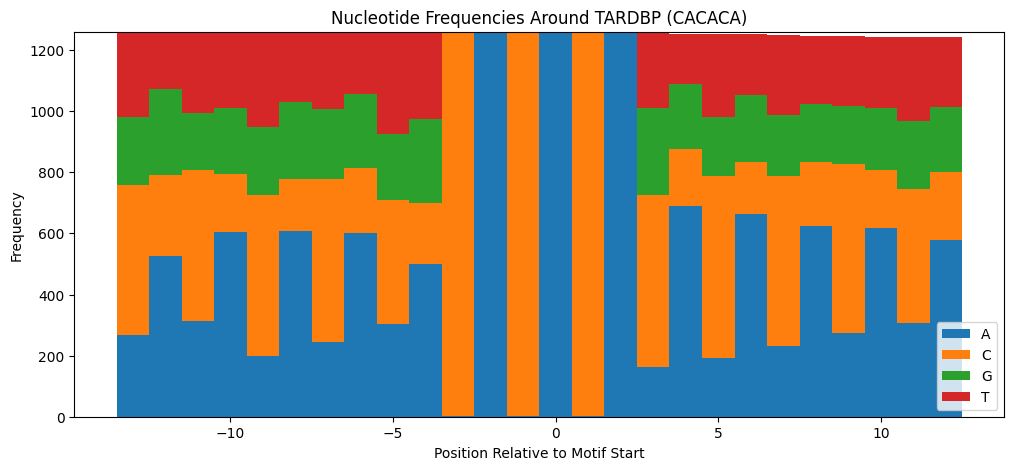

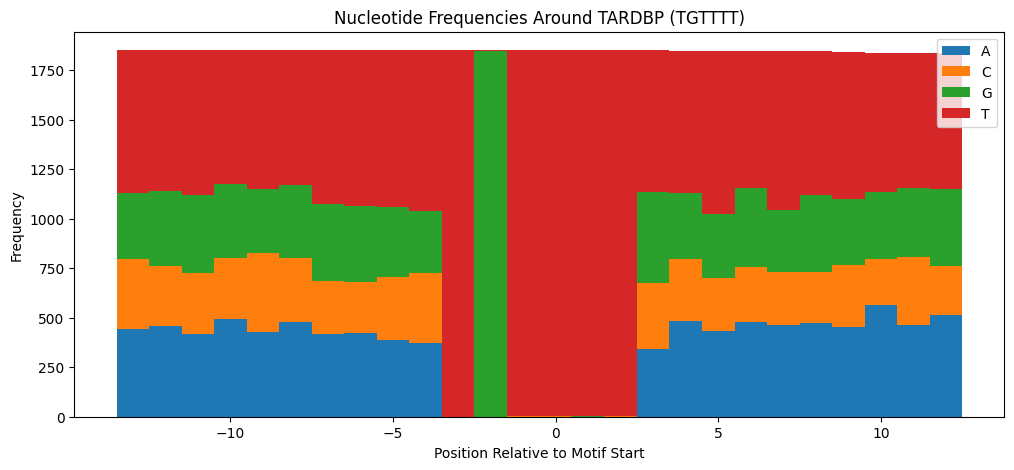

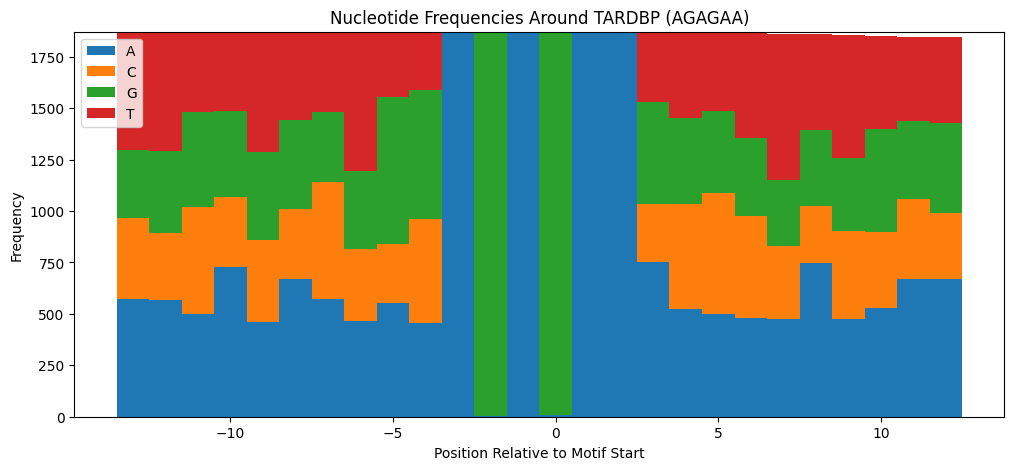

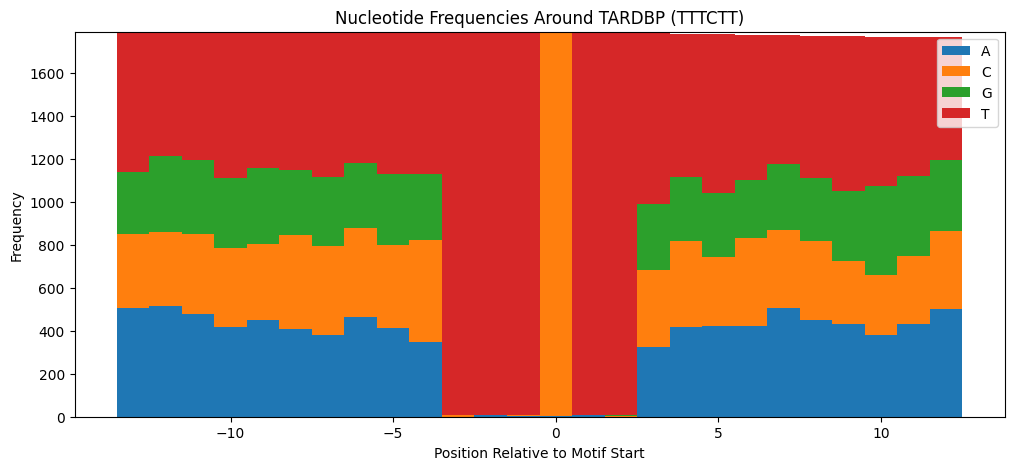

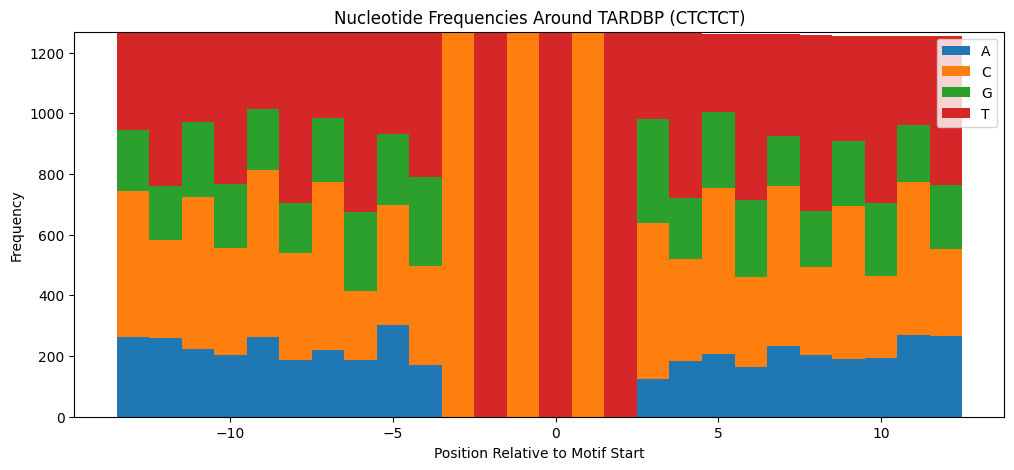

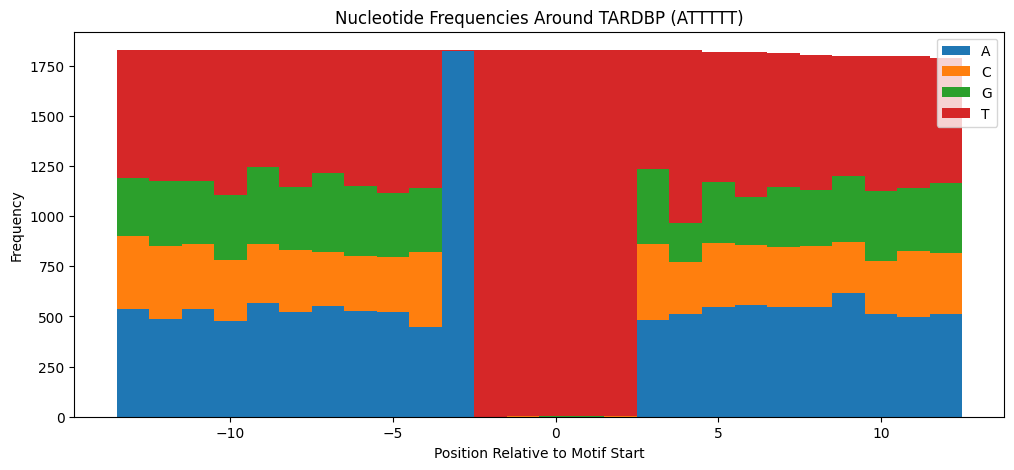

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the new data from the provided CSV file
data_path = 'BERTRBP_exon_seq_FUS_TARDBP.csv'  # Update the path to your data file
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its summary information
print(data.head())
print(data.info())
print(data.describe())

# Determining high-binding thresholds for motifs analysis
fus_high_threshold = data['FUS'].quantile(0.9)
tardbp_high_threshold = data['TARDBP'].quantile(0.9)

# Filtering data for high binding scores
high_binding_fus = data[data['FUS'] >= fus_high_threshold]
high_binding_tardbp = data[data['TARDBP'] >= tardbp_high_threshold]

# Finding motifs in sequences
def find_motifs(sequences, motif_length=6):
    motifs = Counter()
    for seq in sequences:
        for i in range(len(seq) - motif_length + 1):
            motif = seq[i:i + motif_length]
            motifs[motif] += 1
    return motifs

high_binding_fus_sequences = high_binding_fus['exon_sequence']
high_binding_tardbp_sequences = high_binding_tardbp['exon_sequence']
fus_motifs = find_motifs(high_binding_fus_sequences, motif_length=6)
tardbp_motifs = find_motifs(high_binding_tardbp_sequences, motif_length=6)

# Extract contexts for the most frequent motifs
def extract_context(sequences, motif, window=10):
    context_data = []
    motif_length = len(motif)
    for seq in sequences:
        start = 0
        while True:
            start = seq.find(motif, start)
            if start == -1:
                break
            start_index = max(0, start - window)
            end_index = min(len(seq), start + motif_length + window)
            context = seq[start_index:end_index]
            context_data.append(context)
            start += motif_length
    return context_data

# Plotting function for motifs
def plot_nucleotide_frequencies(contexts, title):
    context_length = len(contexts[0])
    nucleotide_counts = {i: Counter() for i in range(context_length)}
    for context in contexts:
        for i, nucleotide in enumerate(context):
            nucleotide_counts[i][nucleotide] += 1
    position = np.arange(context_length)
    frequencies = {nucleotide: [nucleotide_counts[i][nucleotide] for i in range(context_length)] for nucleotide in 'ACGT'}
    plt.figure(figsize=(12, 5))
    bottom = np.zeros(context_length)
    for nucleotide, freq in frequencies.items():
        plt.bar(position - context_length//2, freq, bottom=bottom, label=nucleotide, width=1)
        bottom += np.array(freq)
    plt.title(f'Nucleotide Frequencies Around {title}')
    plt.xlabel('Position Relative to Motif Start')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plotting top 10 motifs for each protein
def plot_top_motifs(motifs, sequences, protein_name):
    top_motifs = motifs.most_common(10)
    for motif, _ in top_motifs:
        contexts = extract_context(sequences, motif)
        plot_nucleotide_frequencies(contexts, f'{protein_name} ({motif})')

# Execute plotting for both FUS and TARDBP
plot_top_motifs(fus_motifs, high_binding_fus_sequences, 'FUS')
plot_top_motifs(tardbp_motifs, high_binding_tardbp_sequences, 'TARDBP')


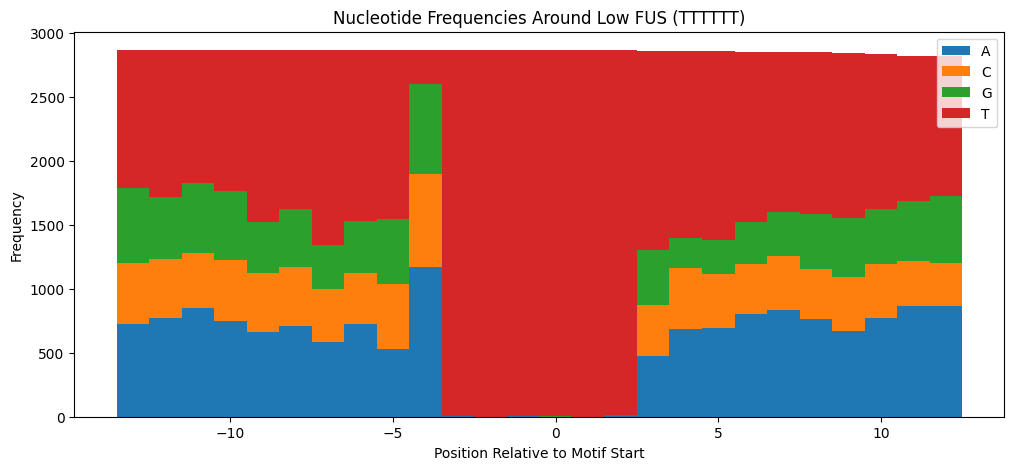

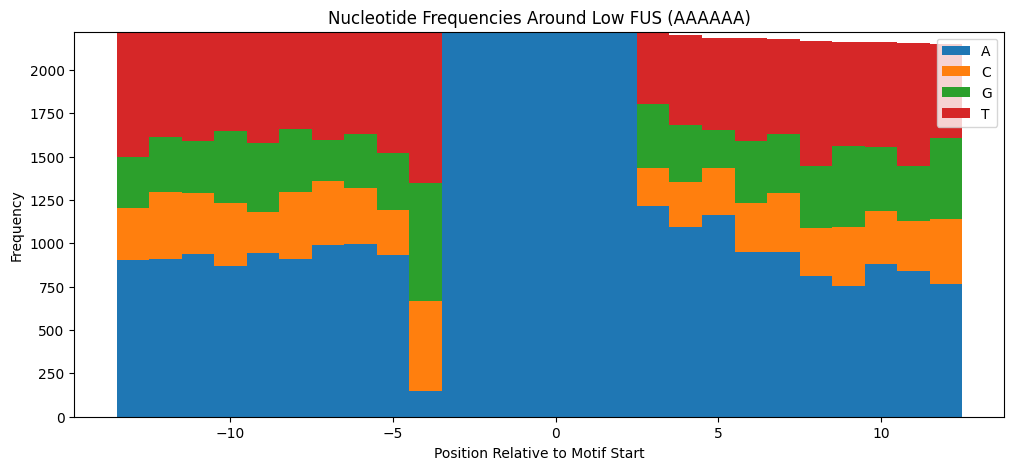

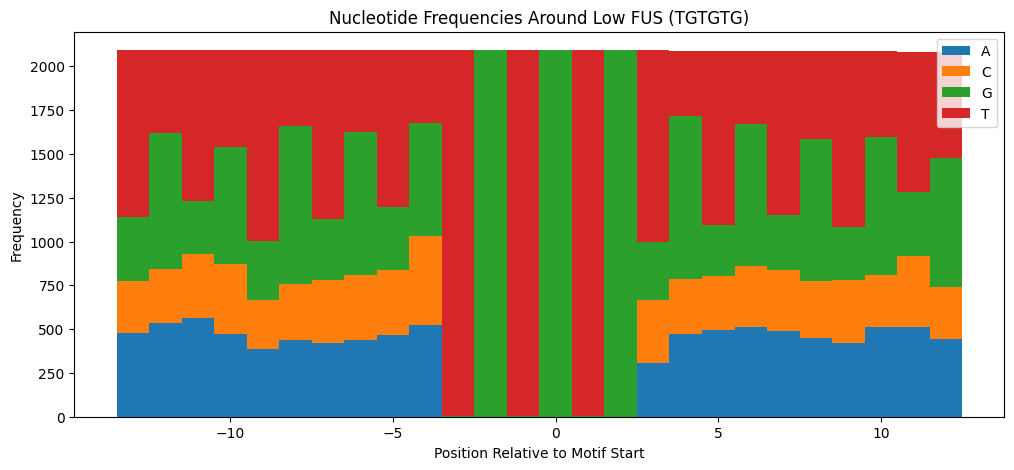

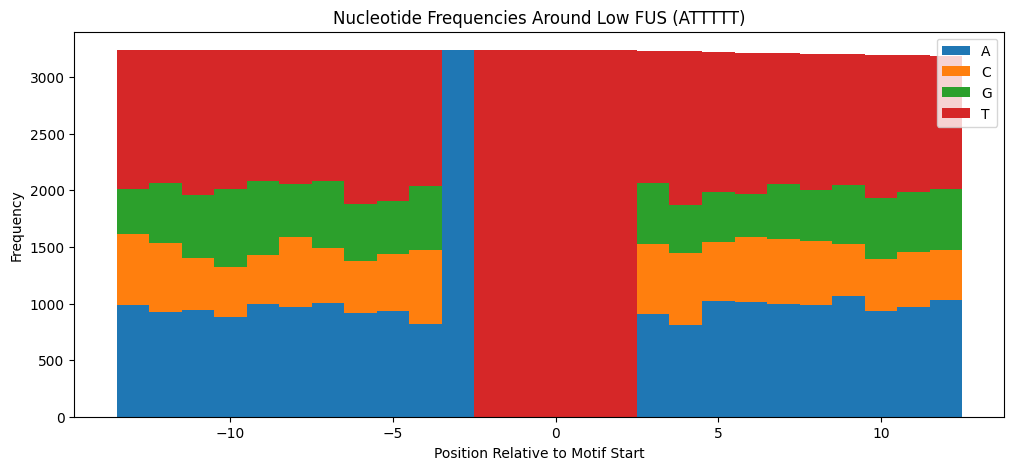

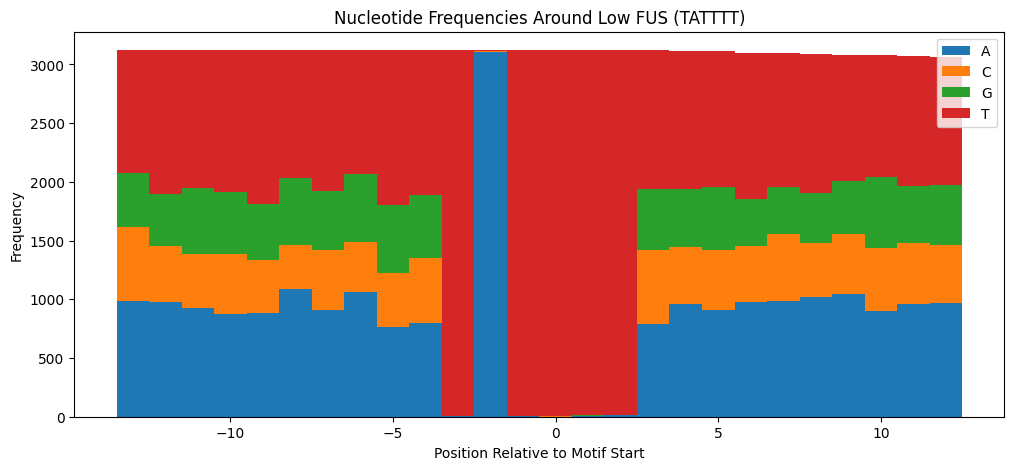

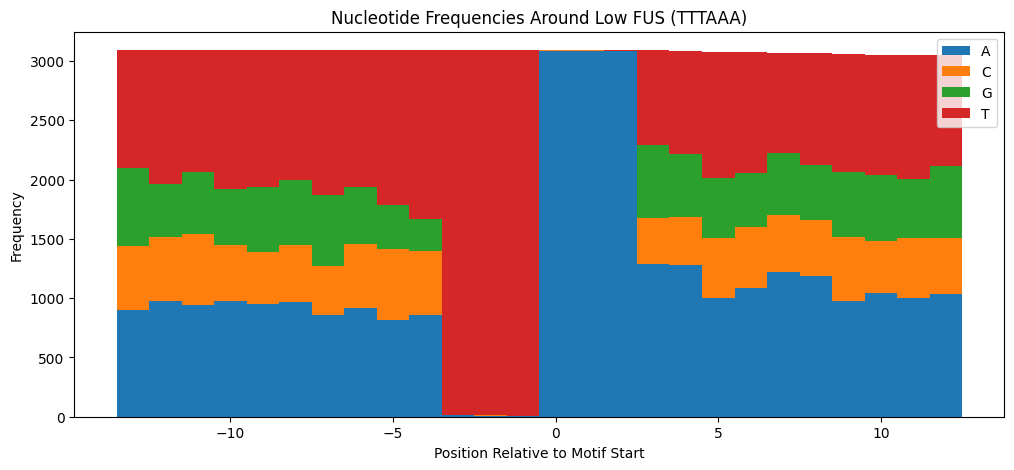

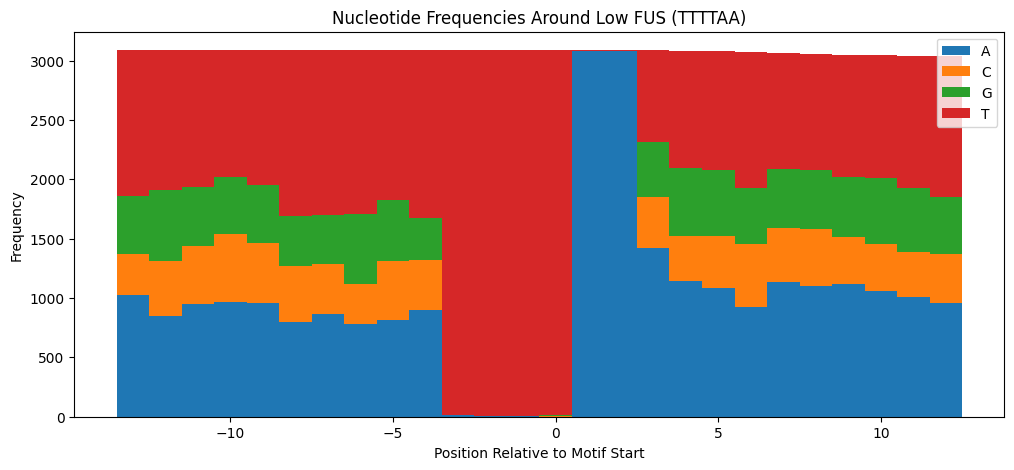

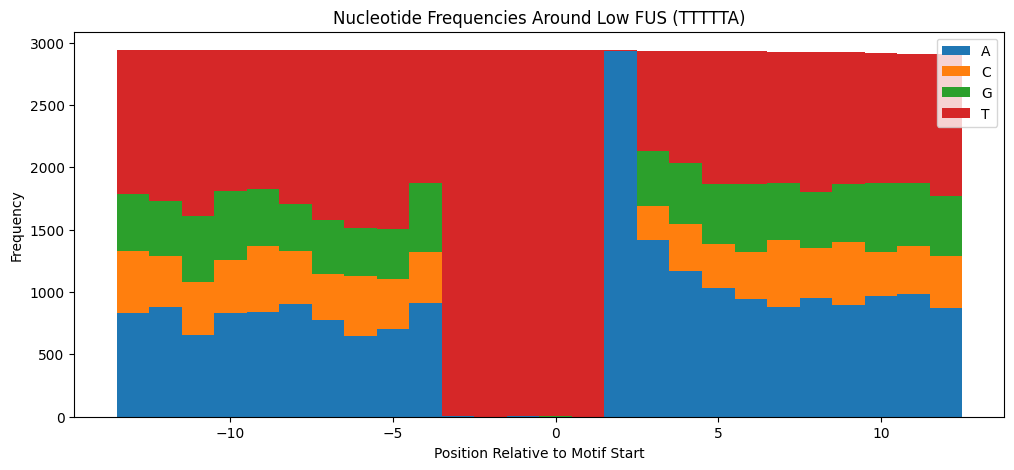

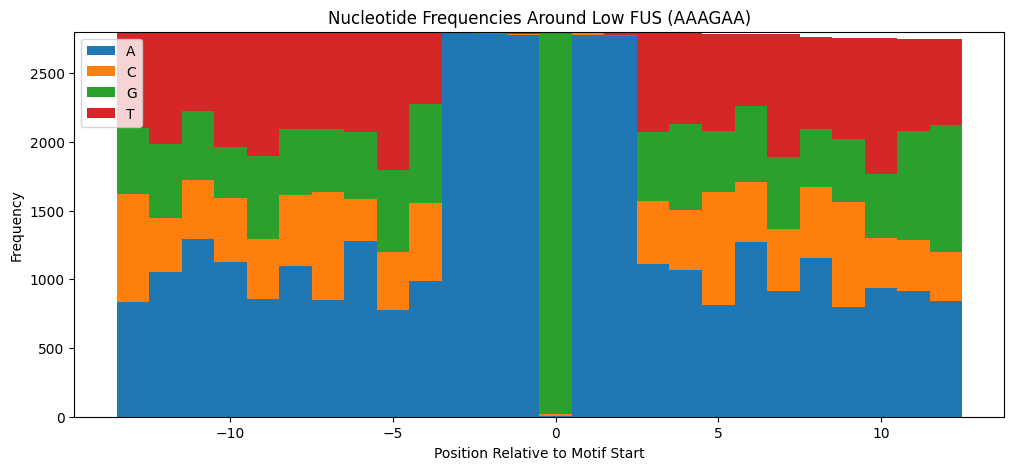

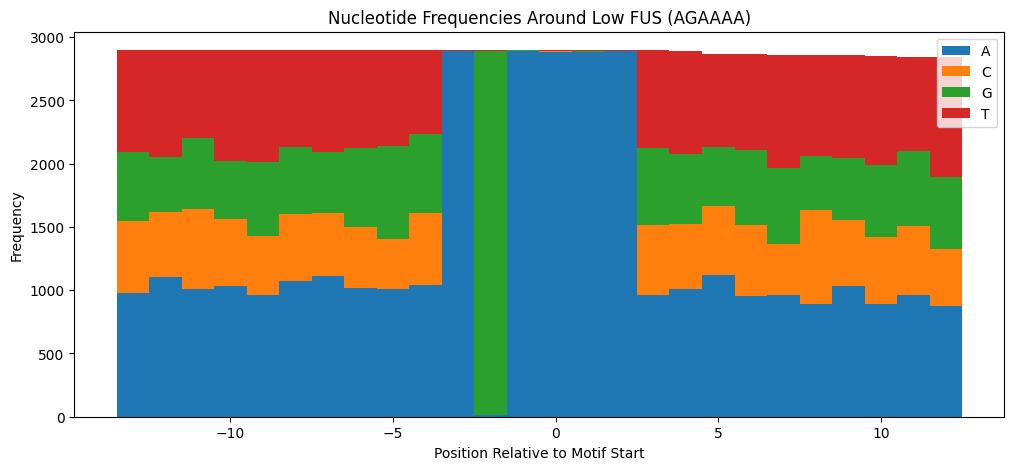

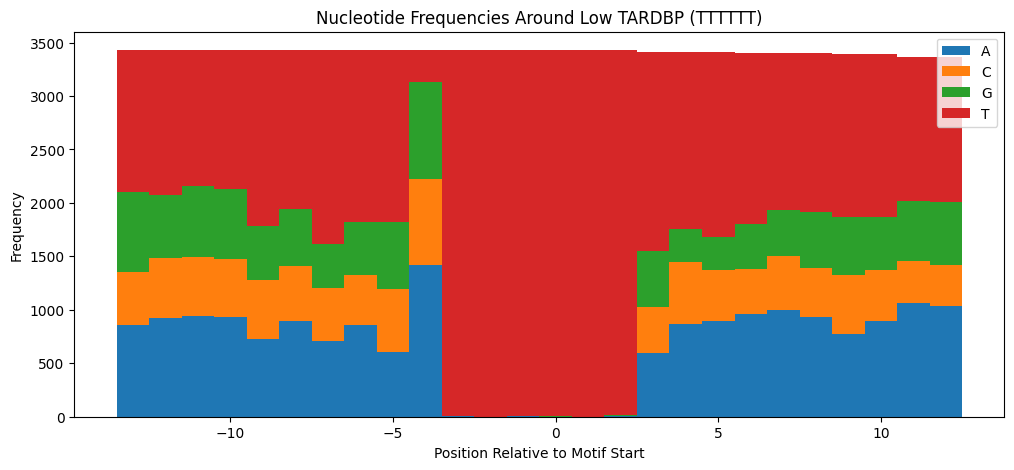

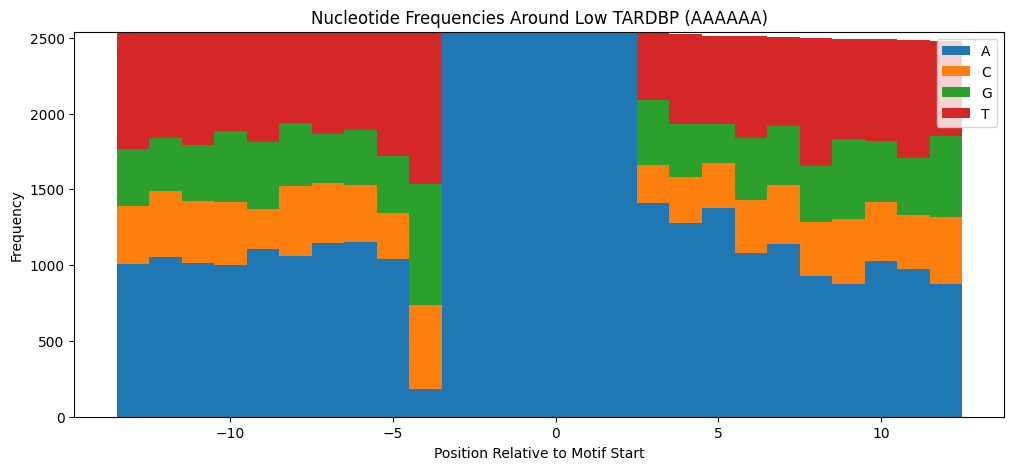

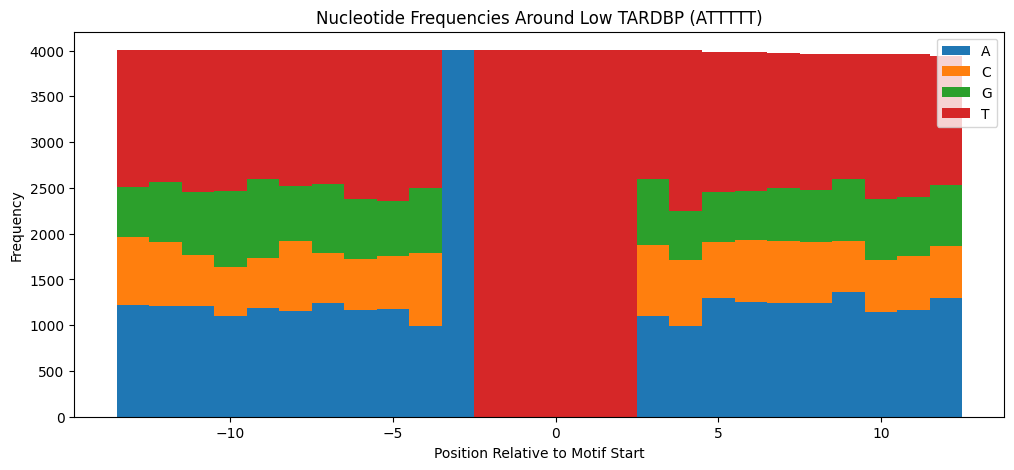

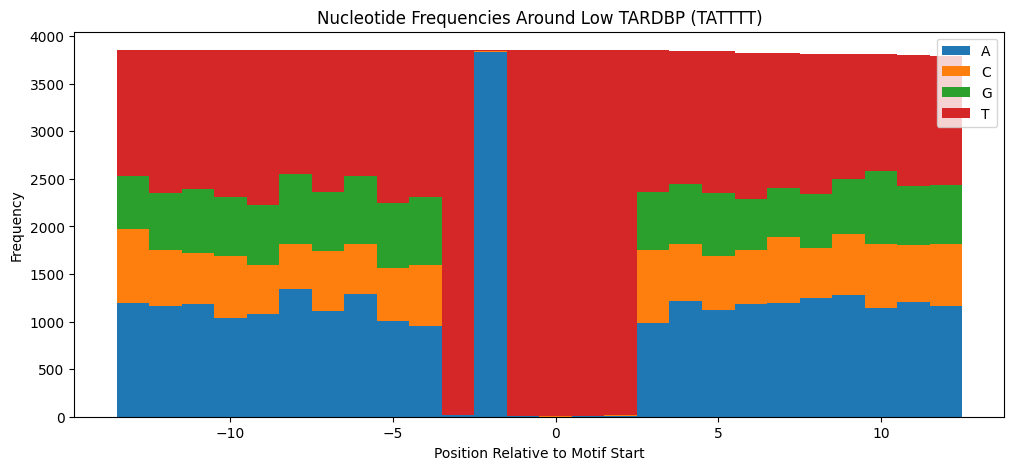

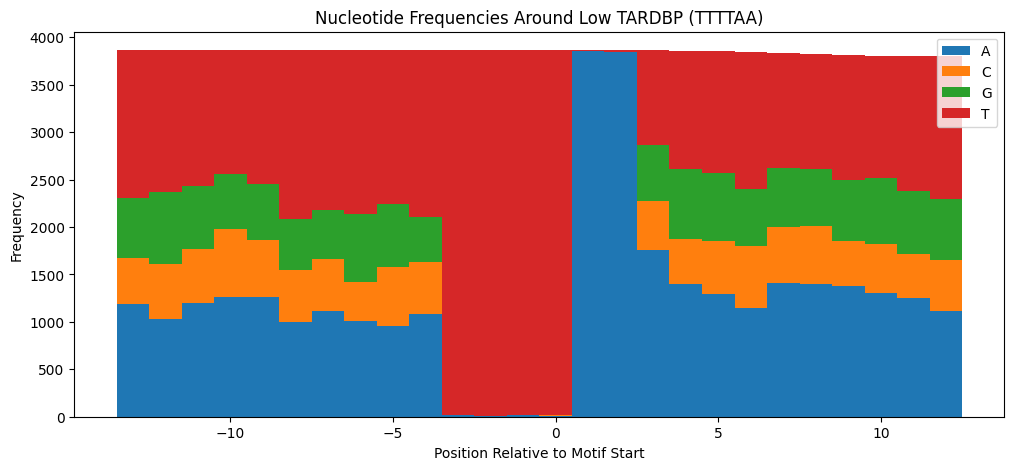

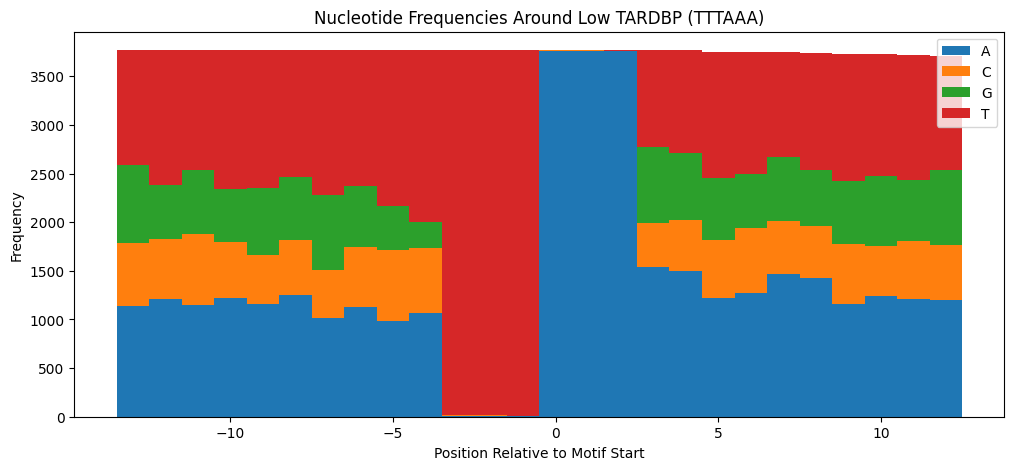

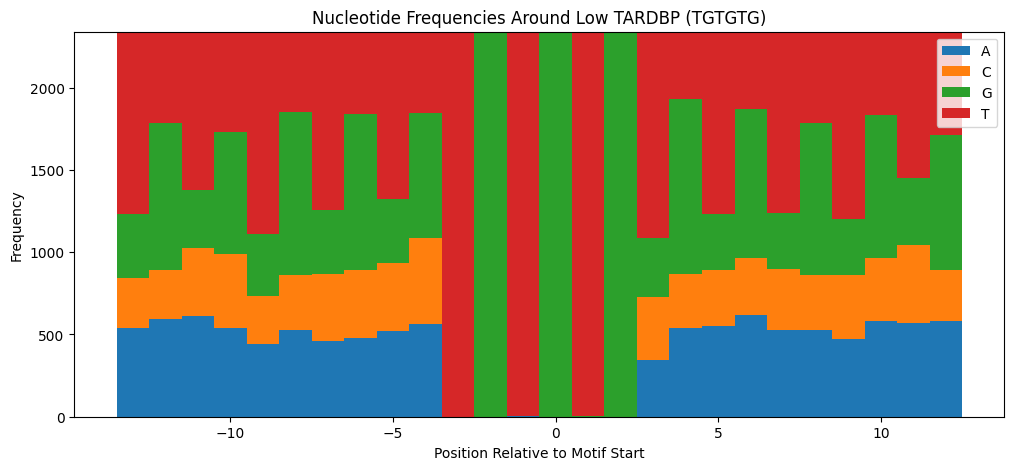

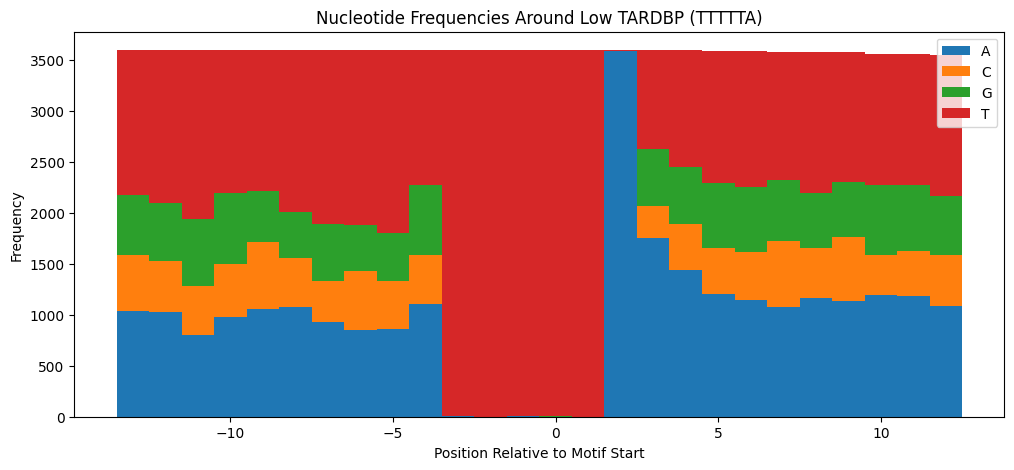

In [ ]:
# Determining low-binding thresholds for motifs analysis
fus_low_threshold = data['FUS'].quantile(0.1)
tardbp_low_threshold = data['TARDBP'].quantile(0.1)

# Filtering data for low binding scores
low_binding_fus = data[data['FUS'] <= fus_low_threshold]
low_binding_tardbp = data[data['TARDBP'] <= tardbp_low_threshold]

low_binding_fus_sequences = low_binding_fus['exon_sequence']
low_binding_tardbp_sequences = low_binding_tardbp['exon_sequence']
fus_low_motifs = find_motifs(low_binding_fus_sequences, motif_length=6)
tardbp_low_motifs = find_motifs(low_binding_tardbp_sequences, motif_length=6)

# Plotting bottom 10 motifs for each protein
plot_top_motifs(fus_low_motifs, low_binding_fus_sequences, 'Low FUS')
plot_top_motifs(tardbp_low_motifs, low_binding_tardbp_sequences, 'Low TARDBP')
